<a href="https://colab.research.google.com/github/soueuwilliam/Shopping_Customer_Clustering/blob/main/Notebooks/analises_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [66]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import numpy as np 

## Baixando dataset

In [2]:
url = 'https://drive.google.com/file/d/1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE/view?usp=sharing'
# output = '../date/Mall_Customers.csv'
output = "Mall_Customers.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UclkCZlhbNXuw4Vv4JKBMh9UoZPZpHTE
To: /home/willliam/Work/pessoal/Shopping_Customer_Clustering/Notebooks/Mall_Customers.csv
100%|██████████| 3.98k/3.98k [00:00<00:00, 3.59MB/s]


'Mall_Customers.csv'

## Importando dados

In [2]:
# Dados Locais baixado do repositorio
df = pd.read_csv('../data/Mall_Customers.csv')

# Dados via colab 
# df = pd.read_csv('Mall_Customers.csv')

print(f"{'-'*20} INFORMAÇÕES SOBRE O DATAFRAME {'-'*20}")
df.info()
print(f"{'-'*32} HEAD {'-'*33}")
df.head()

-------------------- INFORMAÇÕES SOBRE O DATAFRAME --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
-------------------------------- HEAD ---------------------------------


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Analises Exploratórias

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Distribuição por sexo

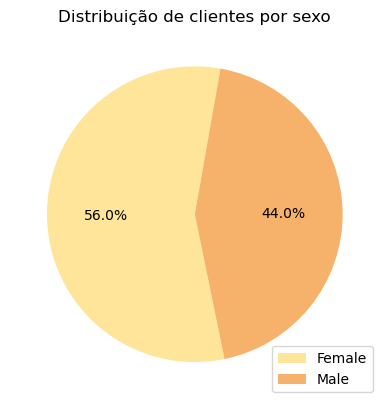

In [4]:
plt.pie(df['Gender'].value_counts(), startangle = 80, colors=['#ffe599', '#f6b26b'], autopct="%1.1f%%" )
plt.rc('font' , size=10)
plt.title('Distribuição de clientes por sexo')
plt.legend(labels = ['Female', 'Male'], loc="lower right")
plt.show()

### Rendimento por sexo

<BarContainer object of 2 artists>

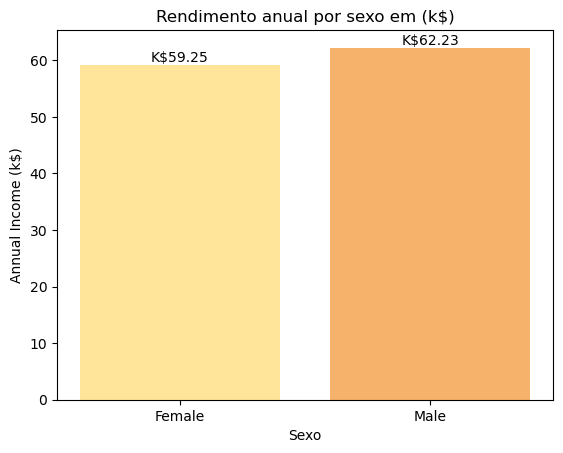

In [5]:

fig, ax = plt.subplots()
bar_container = ax.bar(df['Gender'].value_counts().index, df.groupby('Gender')['Annual Income (k$)'].mean())
ax.bar_label(bar_container ,fmt="K$%.2f")
ax.set(ylabel='Annual Income (k$)',xlabel='Sexo', title='Rendimento anual por sexo em (k$)')
ax.bar(df['Gender'].value_counts().index, df.groupby('Gender')['Annual Income (k$)'].mean(),color=['#ffe599','#f6b26b'])


### Distribuição de idade

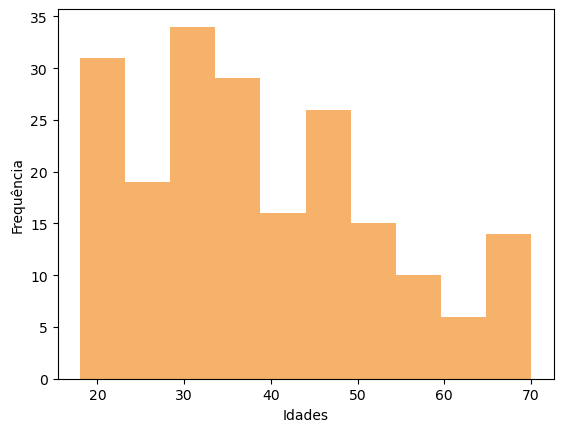

In [6]:
plt.hist(df['Age'],bins=10,color='#f6b26b')
plt.ylabel("Frequência")
plt.xlabel("Idades")
plt.show()

### Distribuição por renda por idade

In [39]:
# Definir as faixas etárias
bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['up to 25 years', '25-30', '30-35', '35-40', '40-45','45-50','50-55','55-60','60-65','65+']
df['age range'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age range
0,1,Male,19,15,39,up to 25 years
1,2,Male,21,15,81,up to 25 years
2,3,Female,20,16,6,up to 25 years
3,4,Female,23,16,77,up to 25 years
4,5,Female,31,17,40,30-35
...,...,...,...,...,...,...
195,196,Female,35,120,79,30-35
196,197,Female,45,126,28,40-45
197,198,Male,32,126,74,30-35
198,199,Male,32,137,18,30-35


In [80]:
df.groupby('age range')[['Spending Score (1-100)','Annual Income (k$)']].mean()

/tmp/ipykernel_3217/132235674.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age range')[['Spending Score (1-100)','Annual Income (k$)']].mean()


,Spending Score (1-100),Annual Income (k$)
age range,,
up to 25 years,54.947368,45.684211
25-30,70.666667,70.291667
30-35,60.305556,66.722222
35-40,53.291667,71.500000
40-45,27.916667,73.166667
45-50,37.384615,59.192308
50-55,35.090909,54.272727
55-60,30.166667,58.916667
60-65,36.800000,46.600000
